## Bicycle Sharing Assignment

#### Problem Statement:

A US bike-sharing provider BoomBikes wants a model for the prediction of demand for shared bikes after quarantine situation ends across the nation due to Covid-19

Essentially, the company wants —
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands
**So interpretation is important!**

In [76]:
# import all libraries required for building the model

#import NumPy and Pandas and read the dataset provided by company
import numpy as np
import pandas as pd

#importing matplotlib and seaborn for data visualisation
import seaborn as sb
import matplotlib.pyplot as plt

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#statistc library to build the model and get the statistical value
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#sklearn library to build the model and scale the data
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

## Step 1. Reading the data

In [77]:
day=pd.read_csv('day.csv')
day.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [78]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [79]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [80]:
day.shape
# checking for Null vaues
day.columns[day.isna().sum() > 0]

Index([], dtype='object')

# EDA

## Dropping columns which has no role in prediction
- instant :Dropping index column instant as it has all unique values and index is not required for prediction

- dteday :Dropping dteday column as the date has no role in prediction as it has all unique values. There are other features like mnth and yr that can be utilised in its place

- casual & registered: These two values give count of casual and registered users respectively. However, there is a column cnt containing sum of these two columns.


In [81]:

day=day.drop(['instant','dteday','casual','registered'],axis=1)

In [82]:
day.shape

(730, 12)

## Step 2. Visualising the data
Understanding the data and find the relation between each

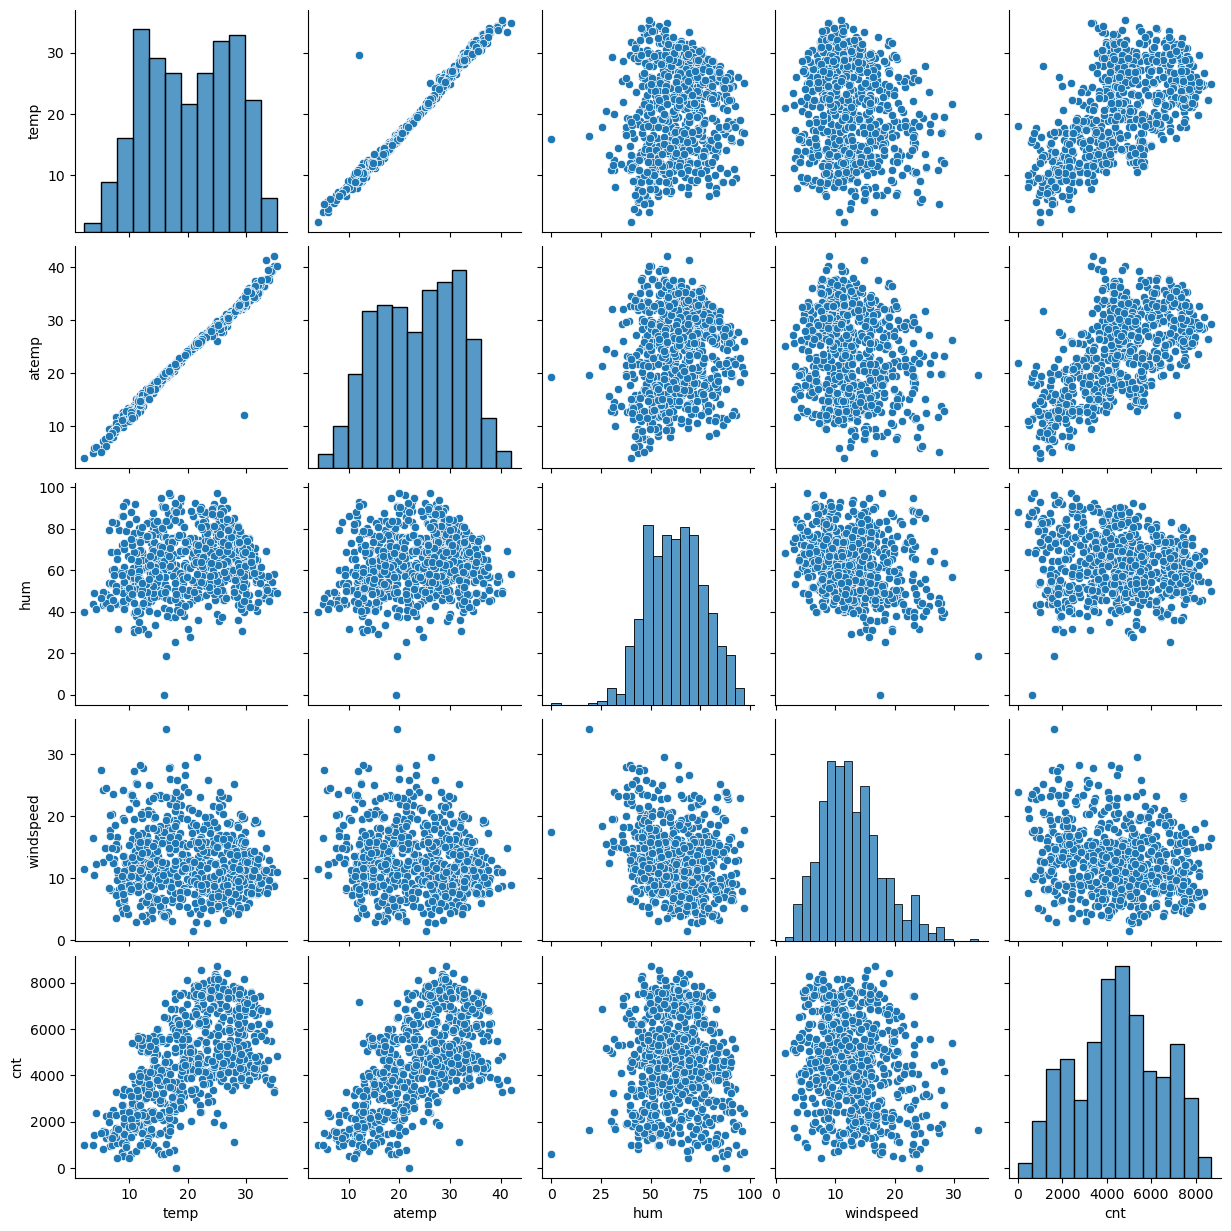

In [83]:
## Plotting Pairplot for Numerical Values
varnumerical=['temp','atemp','hum','windspeed','cnt']
sb.pairplot(day[varnumerical])
plt.show()

# Inferences:
- From above scatter plots, we observe that 'cnt' has positive correlation with 'temp' and 'atemp'.
- There is strong correlation among the variables 'temp' and 'atemp'.
- So, we have to remove any one of them.
- As 'temp' is more sensible, we drop 'atemp'.

In [84]:
day=day.drop(['atemp'],axis=1)

In [85]:
day.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,97.250000,34.000021,8714.000000


## Visualising Categorical Variables
As you might have noticed, there are a 7 categorical variables as well. Let's make a boxplot for some of these variables.
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
   - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
   - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
   - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
   - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

## Creating categories for season,mnth,weekday and weathersit
This will help better visualize the categories

In [86]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [87]:

#1. Season
day['season'] = day['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
print(day['season'].value_counts())

#2. mnth
day['mnth'] = day['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})
print(day['mnth'].value_counts())

#3. weekday
day['weekday'] = day['weekday'].map({1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu',5:'Fri',6:'Sat',0:'Sun'})
print(day['weekday'].value_counts())

#4. weathersit
day['weathersit'] = day['weathersit'].map({1:'Clear', 2:'Mist', 3:'Light', 4:'Heavy'})
print(day['weathersit'].value_counts())

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64
mnth
Jan     62
Mar     62
May     62
Jul     62
Aug     62
Oct     62
Dec     62
Apr     60
Jun     60
Sept    60
Nov     60
Feb     56
Name: count, dtype: int64
weekday
Sat    105
Sun    105
Mon    105
Tue    104
Thu    104
Fri    104
Wed    103
Name: count, dtype: int64
weathersit
Clear    463
Mist     246
Light     21
Name: count, dtype: int64


In [88]:
day.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000


## BoxPlot 

In [89]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


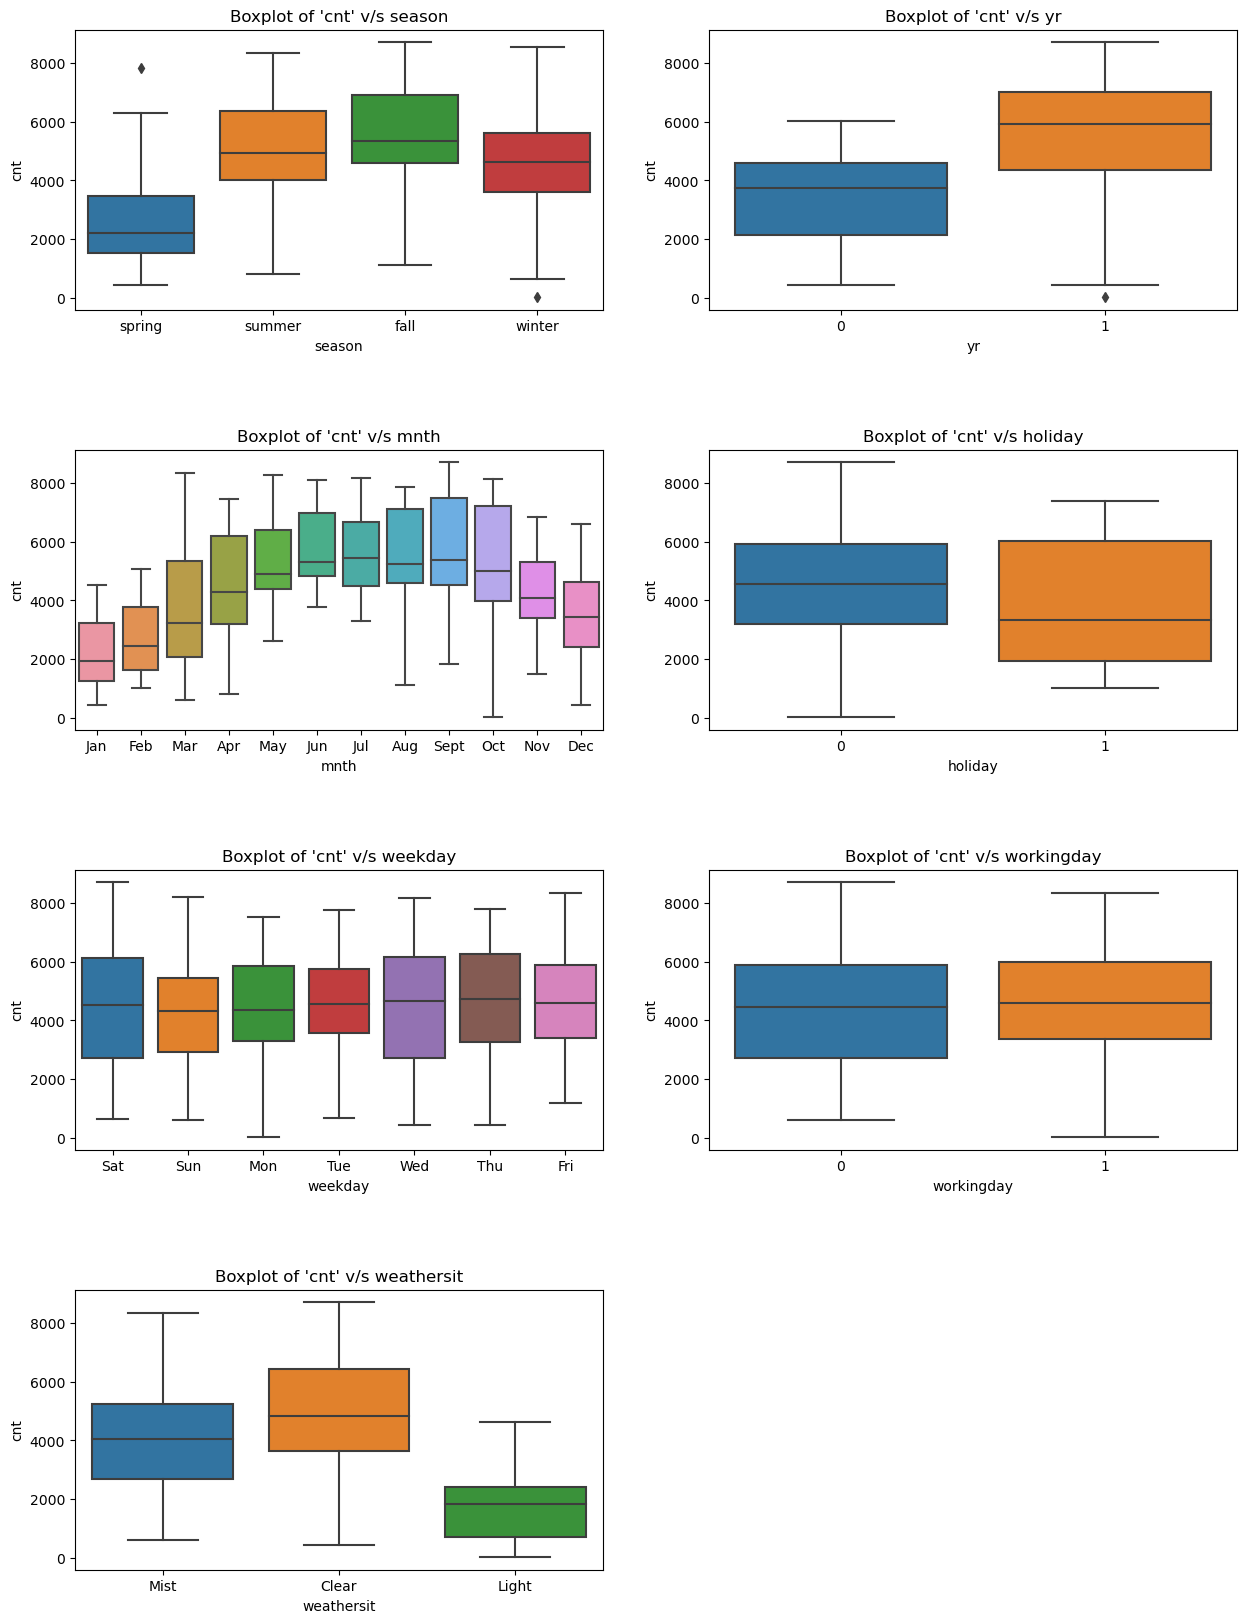

In [90]:
# creating categorical feature list
var_categorical=['season','yr','mnth','holiday','weekday','workingday','weathersit']


plt.figure(figsize=(15,20))
plt.subplots_adjust(hspace=.5)
for i, col in enumerate(var_categorical):
    plt.subplot(4,2,i+1)
    plt.title(label="Boxplot of 'cnt' v/s " + col)
    sb.boxplot(x=col, y='cnt', data=day);
    


## Inference from Boxplot
 - 1. Bike Demand is higher during fall and summer from the month of May till October
 - 2. Bike demand was  higher in 2019
 - 3. Bike demand has been highr on Clear weather

##   Visualizing Correlation using heatmap

In [91]:
day.corr(numeric_only=True)

,yr,holiday,workingday,temp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.002945,0.048789,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.252948,-0.028764,-0.015662,0.006257,-0.068764
workingday,-0.002945,-0.252948,1.000000,0.053470,0.023202,-0.018666,0.062542
temp,0.048789,-0.028764,0.053470,1.000000,0.128565,-0.158186,0.627044
hum,-0.112547,-0.015662,0.023202,0.128565,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.018666,-0.158186,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,0.062542,0.627044,-0.098543,-0.235132,1.000000


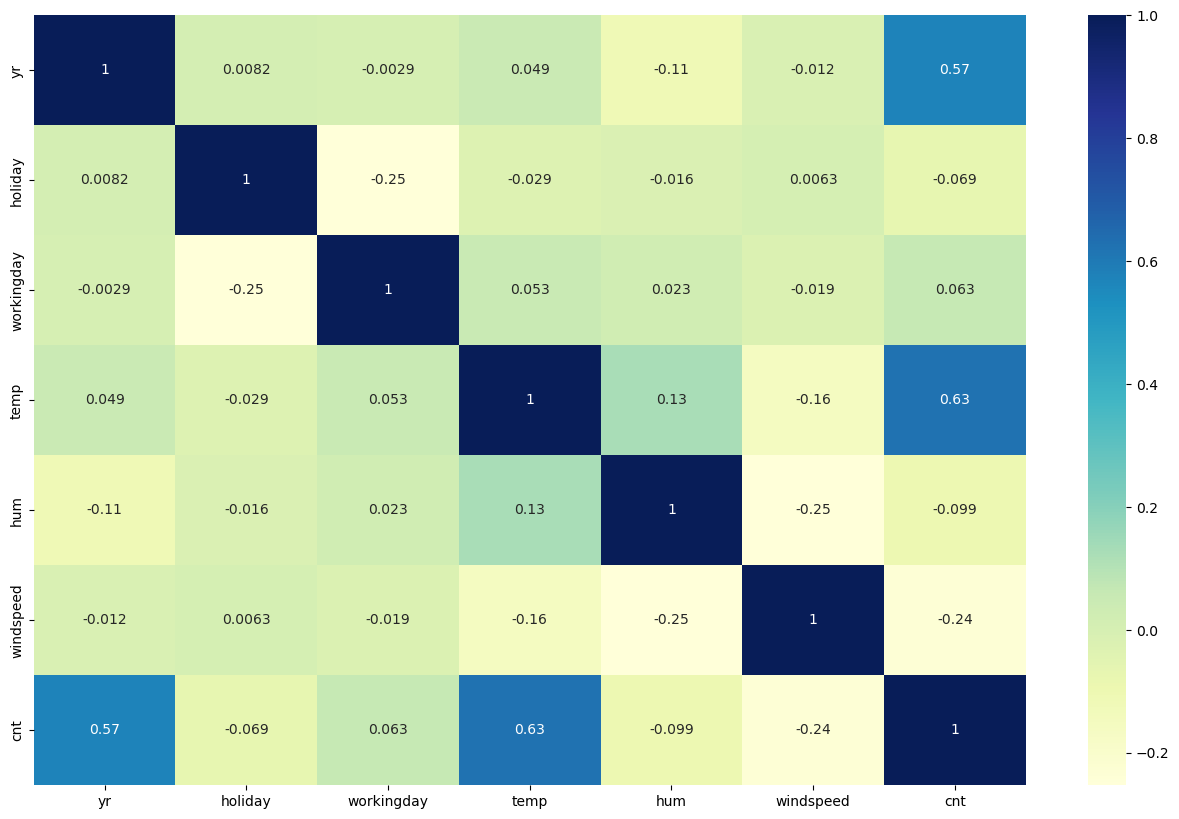

In [92]:

plt.figure(figsize=(16,10))
sb.heatmap(day.corr(numeric_only=True),annot=True,cmap="YlGnBu")
plt.show()

## Inference for Heatmap
- 1. temp and cnt are highly correlated with correlation value 0.63
- 2. yr and cnt are highly correlated post above with correlation of 0.57

### Thus temp and year can  have high role in higher bike demands

## Step 3: Data Preparation

 ### Dummy Variables

The variable season,mnth,weekday and weathersit has  levels.We need to create dummy variables for them.

For this, we will use something called dummy variables.

In [93]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [94]:

# Creating dummy variables
# Let's drop the first column from status df using 'drop_first = True'
var_dumies=['season','mnth','weekday','weathersit']
status= pd.get_dummies(day[var_dumies].astype(str),dtype='int', drop_first = True)


In [95]:
# Add the results to the original day dataframe

day = pd.concat([day, status], axis = 1)

In [96]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light,weathersit_Mist
0,spring,0,Jan,0,Sat,0,Mist,14.110847,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,Jan,0,Sun,0,Mist,14.902598,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [97]:
# dropping all variables for whom dummy has been created
day=day.drop(['season','mnth','weekday','weathersit'],axis=1)

In [98]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   yr                730 non-null    int64  
 1   holiday           730 non-null    int64  
 2   workingday        730 non-null    int64  
 3   temp              730 non-null    float64
 4   hum               730 non-null    float64
 5   windspeed         730 non-null    float64
 6   cnt               730 non-null    int64  
 7   season_spring     730 non-null    int32  
 8   season_summer     730 non-null    int32  
 9   season_winter     730 non-null    int32  
 10  mnth_Aug          730 non-null    int32  
 11  mnth_Dec          730 non-null    int32  
 12  mnth_Feb          730 non-null    int32  
 13  mnth_Jan          730 non-null    int32  
 14  mnth_Jul          730 non-null    int32  
 15  mnth_Jun          730 non-null    int32  
 16  mnth_Mar          730 non-null    int32  
 1

In [99]:
day.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light,weathersit_Mist
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## Conclusion:
- Created dummy columns for 'season','mnth','weekday','weathersit'
- The dataframe now contains 29 columns thus adding adding 22 new dummy

In [100]:
# Perforform null value check
day.columns[day.isna().sum() > 0]

Index([], dtype='object')

## Inference:
- No null values post adding the dummy columns

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [101]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)

In [102]:
# printing the shape of training and test sets
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


##  Build a Model using RFE and Automated approach

### Rescaling the Features 

In [103]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
scaler = MinMaxScaler()
num_vars = ['temp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [104]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light,weathersit_Mist
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [105]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light,weathersit_Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


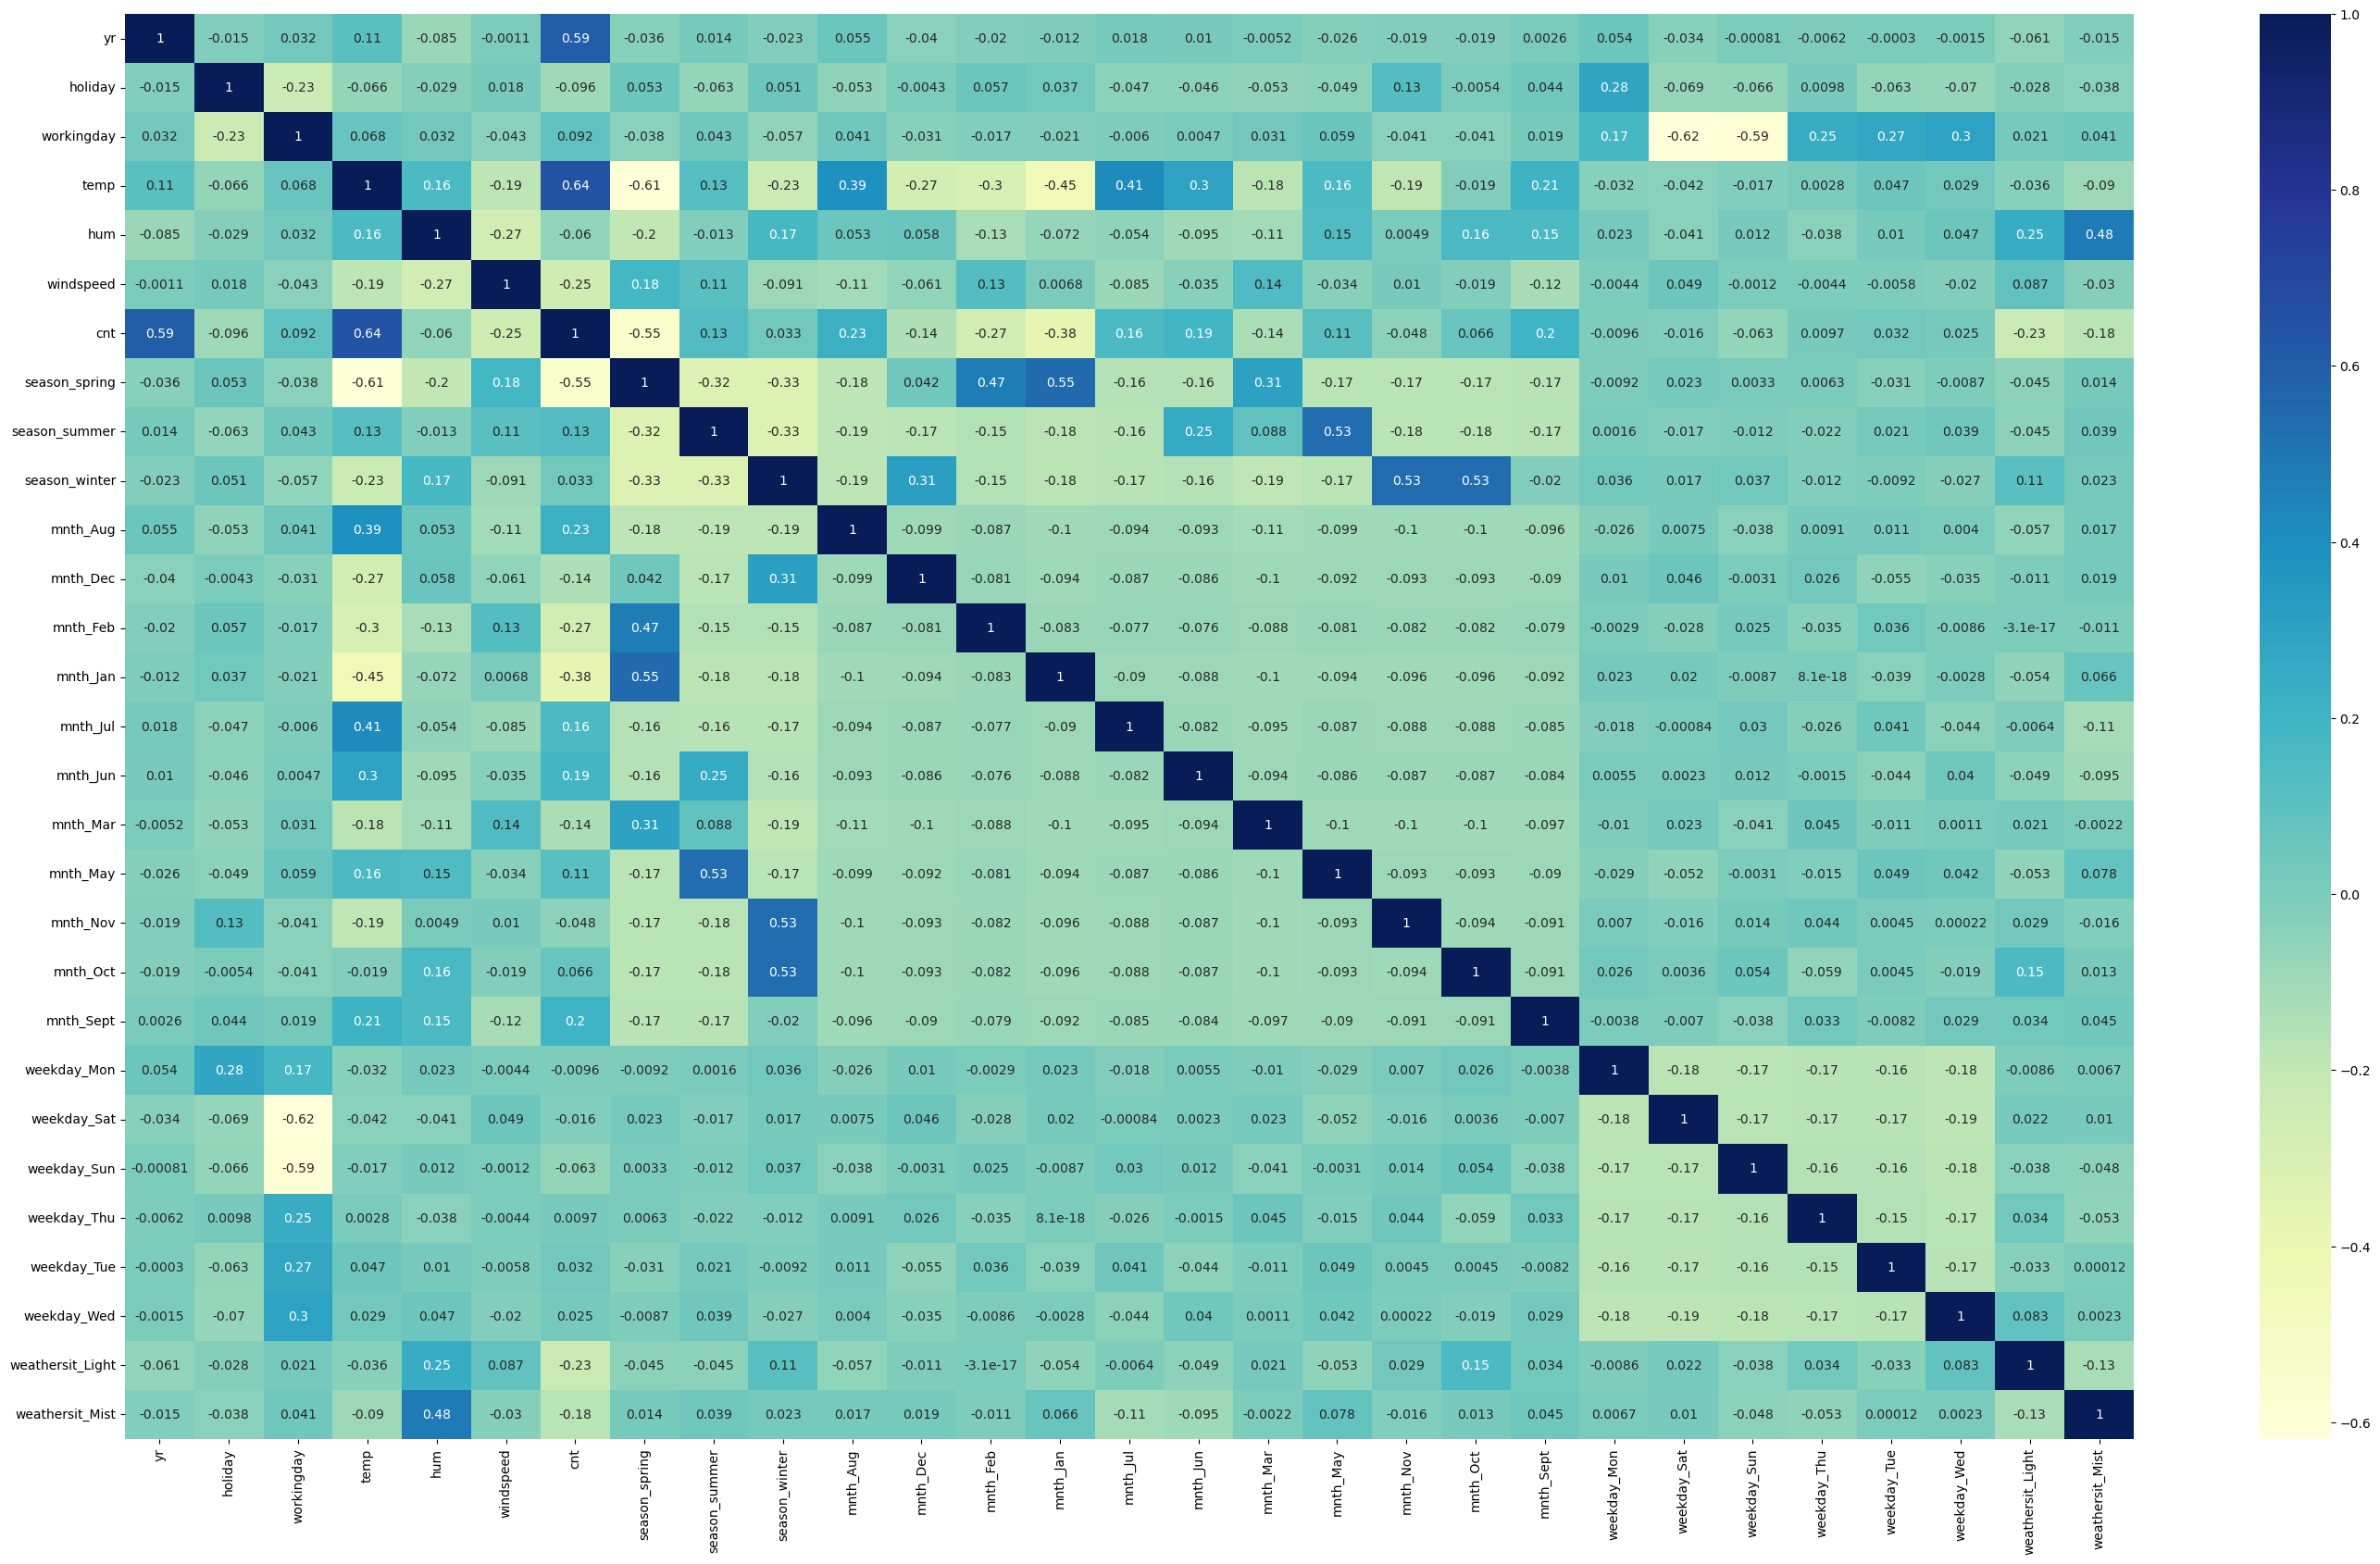

In [106]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (35, 20))
sb.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Inference:
- 1. Darker region denotes high correlation
- 2. yr and temp have high correlation with cnt

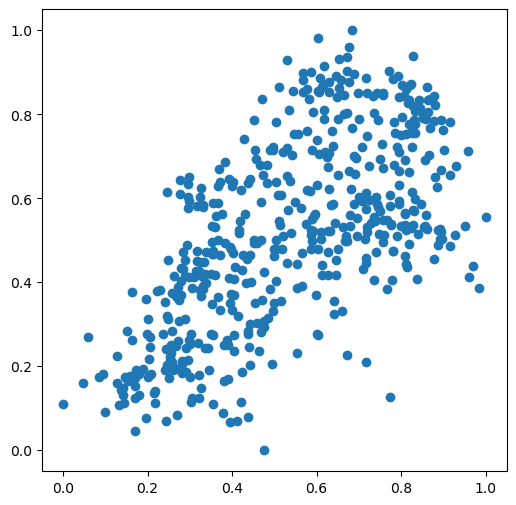

In [107]:
# Plotting Scatter plot for more inference

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

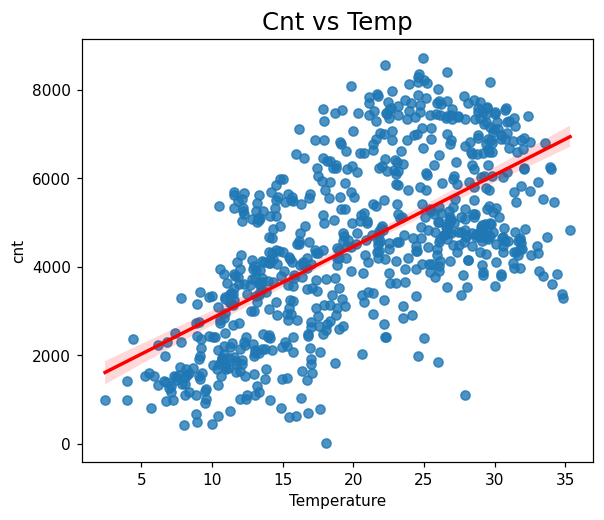

In [108]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sb.regplot(data=day,y="cnt",x="temp", line_kws={"color": "red"})
plt.xlabel("Temperature")
plt.show()

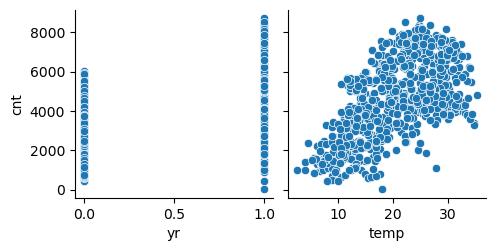

In [109]:
# Plotting pairplot to get more understanding on correlation

sb.pairplot(data=day,x_vars=['yr','temp'],y_vars=['cnt'])

### Dividing into X and Y sets for the model building

In [110]:
y_train = df_train.pop('cnt')
X_train = df_train
print(X_train.shape)
print(y_train.shape)

(510, 28)
(510,)


##  Build a Model using RFE and Automated approach

In [111]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lr,n_features_to_select=15)
rfe.fit(X_train,y_train)

NameError: name 'lr' is not defined

In [ ]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [ ]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [ ]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [ ]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]


In [ ]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

In [ ]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Jan', 'mnth_Jul', 'mnth_Sept', 'weekday_Sat',
       'weathersit_Light', 'weathersit_Mist']]

In [ ]:
X_train_rfe.shape

## Model 1 - Start with all variables selected by RFE

In [ ]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Jan', 'mnth_Jul', 'mnth_Sept', 'weekday_Sat',
       'weathersit_Mist', 'weathersit_Light']

build_model(cols)
get_vif(cols)

In [ ]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sb.heatmap(day[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Jan', 'mnth_Jul', 'mnth_Sept', 'weekday_Sat',
       'weathersit_Mist', 'weathersit_Light']].corr(), cmap='GnBu', annot=True)
plt.show()

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [ ]:
# Add a constant
X_train_lm = sm.add_constant(X_train)
# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

In [ ]:
# Check the parameters obtained
lr.params

## Inferences:
    - R-squared is quite high (0.853)
    - we will also look at VIF values to decide which variable to drop

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

## Inference Model 1:
We get R-squared value of 0.853
- The variable workingday has very high VIF (85.58) but low p value
- Variable mnth_Oct has both high VIF : 6.59 and high p value : 0.833
So, we will first drop workingday

In [112]:
X = X_train.drop('mnth_Oct', axis=1)

In [113]:
# Build 2nd model

X_train_lm = sm.add_constant(X)

lr2 = sm.OLS(y_train, X_train_lm).fit()

# Check the summary of 2nd model
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     108.0
Date:                Wed, 17 Apr 2024   Prob (F-statistic):          8.50e-183
Time:                        04:38:52   Log-Likelihood:                 527.93
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     483   BIC:                            -887.5
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2476      0.033      7.495      0.000       0.183       0.313
yr                   0.2320      0.008     28.864      0.000       0.216       0.248
holiday              0.0108      0.024      0.458      0.647      -0.036       0.057
workingday           0.0974      0.012      8.142      0.000       0.074       0.121
temp                 0.4502      0.046      9.742      0.000       0.359       0.541
hum                 -0.1504      0.038     -3.941      0.000      -0.225      -0.075
windspeed           -0.1864      0.026     -7.263      0.000      -0.237      -0.136
season_spring       -0.0482      0.030     -1.609      0.108      -0.107       0.011
season_summer        0.0364      0.024      1.534      0.126      -0.010       0.083
season_winter        0.1087      0.024      4.467      0.000       0.061       0.157
mnth_Aug             0.0110      0.029      0.373      0.709      -0.047       0.069
mnth_Dec            -0.0512      0.020     -2.523      0.012      -0.091      -0.011
mnth_Feb            -0.0358      0.028     -1.270      0.205      -0.091       0.020
mnth_Jan            -0.0664      0.029     -2.302      0.022      -0.123      -0.010
mnth_Jul            -0.0438      0.031     -1.408      0.160      -0.105       0.017
mnth_Jun            -0.0049      0.023     -0.211      0.833      -0.051       0.041
mnth_Mar            -0.0016      0.021     -0.078      0.938      -0.043       0.040
mnth_May             0.0227      0.020      1.127      0.260      -0.017       0.062
mnth_Nov            -0.0483      0.019     -2.499      0.013      -0.086      -0.010
mnth_Sept            0.0769      0.025      3.071      0.002       0.028       0.126
weekday_Mon         -0.0209      0.015     -1.370      0.171      -0.051       0.009
weekday_Sat          0.0970      0.013      7.226      0.000       0.071       0.123
weekday_Sun          0.0424      0.014      3.109      0.002       0.016       0.069
weekday_Thu         -0.0092      0.015     -0.594      0.553      -0.040       0.021
weekday_Tue         -0.0189      0.015     -1.223      0.222      -0.049       0.011
weekday_Wed         -0.0054      0.015     -0.362      0.717      -0.035       0.024
weathersit_Light    -0.2573      0.026     -9.785      0.000      -0.309      -0.206
weathersit_Mist     -0.0611      0.010     -5.869      0.000      -0.082      -0.041
==============================================================================
Omnibus:                       83.762   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.544
Skew:                          -0.798   Prob(JB):                     3.19e-51
Kurtosis:                       5.897   Cond. No.                     1.28e+16
=====================================================

## Inferences Model 2:
    - R-squared is quite high (0.853)
    - we will also look at VIF values to decide which variable to drop

In [114]:
# Checking VIF again
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,75.97
20,weekday_Sat,17.47
21,weekday_Sun,16.29
6,season_spring,10.79
8,season_winter,7.24
3,temp,7.11
7,season_summer,6.81
9,mnth_Aug,4.90
13,mnth_Jul,4.46
12,mnth_Jan,4.37


In [115]:
# Removing season_summer as it has both high VIF 6.81 and high p value 0.126 (higher than season_spring 0.108)
X = X.drop('season_summer', axis=1)


In [116]:
# Build 3rd model

X_train_lm = sm.add_constant(X)

lr3 = sm.OLS(y_train, X_train_lm).fit()

# Check the summary of 2nd model
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     112.0
Date:                Wed, 17 Apr 2024   Prob (F-statistic):          2.55e-183
Time:                        04:38:53   Log-Likelihood:                 526.69
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     484   BIC:                            -891.3
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2758      0.028     10.021      0.000       0.222       0.330
yr                   0.2326      0.008     28.925      0.000       0.217       0.248
holiday              0.0174      0.023      0.749      0.454      -0.028       0.063
workingday           0.1042      0.011      9.351      0.000       0.082       0.126
temp                 0.4393      0.046      9.607      0.000       0.349       0.529
hum                 -0.1480      0.038     -3.876      0.000      -0.223      -0.073
windspeed           -0.1840      0.026     -7.173      0.000      -0.234      -0.134
season_spring       -0.0813      0.021     -3.920      0.000      -0.122      -0.041
season_winter        0.0803      0.016      5.085      0.000       0.049       0.111
mnth_Aug            -0.0181      0.023     -0.804      0.422      -0.062       0.026
mnth_Dec            -0.0554      0.020     -2.752      0.006      -0.095      -0.016
mnth_Feb            -0.0373      0.028     -1.321      0.187      -0.093       0.018
mnth_Jan            -0.0687      0.029     -2.381      0.018      -0.125      -0.012
mnth_Jul            -0.0720      0.025     -2.869      0.004      -0.121      -0.023
mnth_Jun            -0.0112      0.023     -0.485      0.628      -0.056       0.034
mnth_Mar            -0.0006      0.021     -0.028      0.978      -0.042       0.041
mnth_May             0.0283      0.020      1.425      0.155      -0.011       0.067
mnth_Nov            -0.0533      0.019     -2.790      0.005      -0.091      -0.016
mnth_Sept            0.0530      0.020      2.700      0.007       0.014       0.092
weekday_Mon         -0.0207      0.015     -1.353      0.177      -0.051       0.009
weekday_Sat          0.1048      0.012      8.423      0.000       0.080       0.129
weekday_Sun          0.0494      0.013      3.838      0.000       0.024       0.075
weekday_Thu         -0.0093      0.016     -0.602      0.548      -0.040       0.021
weekday_Tue         -0.0185      0.015     -1.197      0.232      -0.049       0.012
weekday_Wed         -0.0048      0.015     -0.321      0.748      -0.034       0.024
weathersit_Light    -0.2601      0.026     -9.901      0.000      -0.312      -0.208
weathersit_Mist     -0.0611      0.010     -5.861      0.000      -0.082      -0.041
==============================================================================
Omnibus:                       86.100   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              245.999
Skew:                          -0.810   Prob(JB):                     3.82e-54
Kurtosis:                       5.991   Cond. No.                     1.38e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matr

## Inferences Model 3:
    - R-squared is quite high (0.853)
    - we will also look at VIF values to decide which variable to drop

In [117]:
# Checking VIF again
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,53.08
19,weekday_Sat,11.91
20,weekday_Sun,11.38
3,temp,6.94
6,season_spring,5.16
11,mnth_Jan,4.36
10,mnth_Feb,3.23
1,holiday,3.21
7,season_winter,3.04
12,mnth_Jul,2.90


In [118]:
# Dropping off feature with high p value
# dropping off mnth_Mar with p value =0.978
X = X.drop('mnth_Mar', axis=1)

In [119]:
# Build 4th model

X_train_lm = sm.add_constant(X)

lr4 = sm.OLS(y_train, X_train_lm).fit()

# Check the summary of 2nd model
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.9
Date:                Wed, 17 Apr 2024   Prob (F-statistic):          2.33e-184
Time:                        04:38:54   Log-Likelihood:                 526.69
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     485   BIC:                            -897.5
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2756      0.026     10.432      0.000       0.224       0.327
yr                   0.2326      0.008     28.961      0.000       0.217       0.248
holiday              0.0174      0.023      0.749      0.454      -0.028       0.063
workingday           0.1041      0.011      9.576      0.000       0.083       0.125
temp                 0.4396      0.045      9.780      0.000       0.351       0.528
hum                 -0.1480      0.038     -3.882      0.000      -0.223      -0.073
windspeed           -0.1840      0.026     -7.192      0.000      -0.234      -0.134
season_spring       -0.0816      0.018     -4.571      0.000      -0.117      -0.047
season_winter        0.0804      0.016      5.179      0.000       0.050       0.111
mnth_Aug            -0.0180      0.022     -0.811      0.418      -0.061       0.026
mnth_Dec            -0.0552      0.018     -3.047      0.002      -0.091      -0.020
mnth_Feb            -0.0368      0.022     -1.700      0.090      -0.079       0.006
mnth_Jan            -0.0681      0.022     -3.140      0.002      -0.111      -0.025
mnth_Jul            -0.0719      0.025     -2.893      0.004      -0.121      -0.023
mnth_Jun            -0.0110      0.023     -0.488      0.626      -0.055       0.033
mnth_May             0.0285      0.019      1.482      0.139      -0.009       0.066
mnth_Nov            -0.0532      0.019     -2.853      0.005      -0.090      -0.017
mnth_Sept            0.0531      0.019      2.770      0.006       0.015       0.091
weekday_Mon         -0.0207      0.015     -1.355      0.176      -0.051       0.009
weekday_Sat          0.1047      0.012      8.597      0.000       0.081       0.129
weekday_Sun          0.0494      0.013      3.879      0.000       0.024       0.074
weekday_Thu         -0.0094      0.015     -0.604      0.546      -0.040       0.021
weekday_Tue         -0.0185      0.015     -1.198      0.231      -0.049       0.012
weekday_Wed         -0.0048      0.015     -0.322      0.748      -0.034       0.024
weathersit_Light    -0.2601      0.026     -9.912      0.000      -0.312      -0.209
weathersit_Mist     -0.0611      0.010     -5.867      0.000      -0.082      -0.041
==============================================================================
Omnibus:                       86.058   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              245.608
Skew:                          -0.810   Prob(JB):                     4.64e-54
Kurtosis:                       5.988   Cond. No.                     1.36e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.35e-30. Thi

In [120]:
# Checking VIF again
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,48.67
18,weekday_Sat,10.88
19,weekday_Sun,10.53
3,temp,6.72
6,season_spring,3.83
1,holiday,3.08
7,season_winter,2.94
12,mnth_Jul,2.85
8,mnth_Aug,2.78
11,mnth_Jan,2.47


In [121]:
# as none of the fetaure with high VIF has high p values ,hence removing High p values with low VIF
# Removing weekday_Wed with p value 0.695 and VIF 2.29
X = X.drop('weekday_Wed', axis=1)

In [122]:
# Build 5th model

X_train_lm = sm.add_constant(X)

lr5 = sm.OLS(y_train, X_train_lm).fit()

# Check the summary of 2nd model
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.2
Date:                Wed, 17 Apr 2024   Prob (F-statistic):          2.19e-185
Time:                        04:38:55   Log-Likelihood:                 526.64
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     486   BIC:                            -903.6
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2748      0.026     10.453      0.000       0.223       0.326
yr                   0.2326      0.008     28.986      0.000       0.217       0.248
holiday              0.0161      0.023      0.704      0.482      -0.029       0.061
workingday           0.1025      0.010     10.575      0.000       0.083       0.122
temp                 0.4395      0.045      9.788      0.000       0.351       0.528
hum                 -0.1486      0.038     -3.904      0.000      -0.223      -0.074
windspeed           -0.1840      0.026     -7.199      0.000      -0.234      -0.134
season_spring       -0.0816      0.018     -4.576      0.000      -0.117      -0.047
season_winter        0.0804      0.015      5.189      0.000       0.050       0.111
mnth_Aug            -0.0179      0.022     -0.807      0.420      -0.061       0.026
mnth_Dec            -0.0551      0.018     -3.046      0.002      -0.091      -0.020
mnth_Feb            -0.0367      0.022     -1.700      0.090      -0.079       0.006
mnth_Jan            -0.0682      0.022     -3.144      0.002      -0.111      -0.026
mnth_Jul            -0.0716      0.025     -2.887      0.004      -0.120      -0.023
mnth_Jun            -0.0112      0.023     -0.495      0.621      -0.056       0.033
mnth_May             0.0284      0.019      1.480      0.140      -0.009       0.066
mnth_Nov            -0.0534      0.019     -2.871      0.004      -0.090      -0.017
mnth_Sept            0.0530      0.019      2.769      0.006       0.015       0.091
weekday_Mon         -0.0181      0.013     -1.400      0.162      -0.043       0.007
weekday_Sat          0.1058      0.012      9.034      0.000       0.083       0.129
weekday_Sun          0.0504      0.012      4.114      0.000       0.026       0.075
weekday_Thu         -0.0067      0.013     -0.512      0.609      -0.032       0.019
weekday_Tue         -0.0159      0.013     -1.213      0.226      -0.042       0.010
weathersit_Light    -0.2606      0.026     -9.964      0.000      -0.312      -0.209
weathersit_Mist     -0.0609      0.010     -5.864      0.000      -0.081      -0.041
==============================================================================
Omnibus:                       85.584   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.161
Skew:                          -0.806   Prob(JB):                     9.57e-54
Kurtosis:                       5.982   Cond. No.                     1.36e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.27e-30. This might indicate that there are
strong multicollinearity problems or that the design 

## Inferences Model 4:
    - R-squared is quite high (0.853)
    - we will also look at VIF values to decide which variable to drop

In [123]:
# Checking VIF again
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,46.39
18,weekday_Sat,10.87
19,weekday_Sun,10.52
3,temp,6.72
6,season_spring,3.83
1,holiday,3.02
7,season_winter,2.94
12,mnth_Jul,2.85
8,mnth_Aug,2.78
11,mnth_Jan,2.47


In [124]:
# as none of the fetaure with high VIF has high p values ,hence removing High p values with low VIF
# Removing mnth_Jun with p value 0.695 and VIF 2.29
X = X.drop('mnth_Jun', axis=1)

In [125]:
# Build 6th model

X_train_lm = sm.add_constant(X)

lr6 = sm.OLS(y_train, X_train_lm).fit()

# Check the summary of 6th model
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     127.9
Date:                Wed, 17 Apr 2024   Prob (F-statistic):          2.16e-186
Time:                        04:38:55   Log-Likelihood:                 526.51
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     487   BIC:                            -909.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2759      0.026     10.536      0.000       0.224       0.327
yr                   0.2330      0.008     29.231      0.000       0.217       0.249
holiday              0.0172      0.023      0.755      0.451      -0.027       0.062
workingday           0.1026      0.010     10.594      0.000       0.084       0.122
temp                 0.4266      0.036     11.691      0.000       0.355       0.498
hum                 -0.1459      0.038     -3.876      0.000      -0.220      -0.072
windspeed           -0.1825      0.025     -7.197      0.000      -0.232      -0.133
season_spring       -0.0797      0.017     -4.583      0.000      -0.114      -0.046
season_winter        0.0830      0.015      5.693      0.000       0.054       0.112
mnth_Aug            -0.0110      0.017     -0.638      0.524      -0.045       0.023
mnth_Dec            -0.0567      0.018     -3.184      0.002      -0.092      -0.022
mnth_Feb            -0.0385      0.021     -1.805      0.072      -0.080       0.003
mnth_Jan            -0.0708      0.021     -3.368      0.001      -0.112      -0.029
mnth_Jul            -0.0639      0.019     -3.316      0.001      -0.102      -0.026
mnth_May             0.0332      0.017      2.006      0.045       0.001       0.066
mnth_Nov            -0.0545      0.018     -2.952      0.003      -0.091      -0.018
mnth_Sept            0.0578      0.017      3.503      0.001       0.025       0.090
weekday_Mon         -0.0182      0.013     -1.411      0.159      -0.044       0.007
weekday_Sat          0.1057      0.012      9.036      0.000       0.083       0.129
weekday_Sun          0.0504      0.012      4.114      0.000       0.026       0.074
weekday_Thu         -0.0065      0.013     -0.502      0.616      -0.032       0.019
weekday_Tue         -0.0156      0.013     -1.194      0.233      -0.041       0.010
weathersit_Light    -0.2609      0.026     -9.984      0.000      -0.312      -0.210
weathersit_Mist     -0.0612      0.010     -5.897      0.000      -0.082      -0.041
==============================================================================
Omnibus:                       86.605   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              252.320
Skew:                          -0.809   Prob(JB):                     1.62e-55
Kurtosis:                       6.043   Cond. No.                     1.38e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  8e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Inferences Model 6:
    - R-squared is quite high (0.852)
    - we will also look at VIF values to decide which variable to drop

In [126]:
# Checking VIF again
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,46.15
17,weekday_Sat,10.83
18,weekday_Sun,10.48
3,temp,4.44
6,season_spring,3.65
1,holiday,2.99
7,season_winter,2.61
11,mnth_Jan,2.33
4,hum,1.97
10,mnth_Feb,1.85


In [127]:
# as none of the fetaure with high VIF has high p values ,hence removing High p values with low VIF
# Removing weekday_Thu with p value 0.695 and VIF 2.29
X = X.drop('weekday_Thu', axis=1)

In [128]:
# Build 7th model

X_train_lm = sm.add_constant(X)

lr7 = sm.OLS(y_train, X_train_lm).fit()

# Check the summary of 6th model
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     134.2
Date:                Wed, 17 Apr 2024   Prob (F-statistic):          2.09e-187
Time:                        04:38:56   Log-Likelihood:                 526.38
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     488   BIC:                            -915.6
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2748      0.026     10.538      0.000       0.224       0.326
yr                   0.2330      0.008     29.253      0.000       0.217       0.249
holiday              0.0155      0.022      0.691      0.490      -0.029       0.060
workingday           0.1014      0.009     10.806      0.000       0.083       0.120
temp                 0.4265      0.036     11.699      0.000       0.355       0.498
hum                 -0.1457      0.038     -3.873      0.000      -0.220      -0.072
windspeed           -0.1825      0.025     -7.204      0.000      -0.232      -0.133
season_spring       -0.0798      0.017     -4.592      0.000      -0.114      -0.046
season_winter        0.0832      0.015      5.714      0.000       0.055       0.112
mnth_Aug            -0.0110      0.017     -0.638      0.524      -0.045       0.023
mnth_Dec            -0.0570      0.018     -3.208      0.001      -0.092      -0.022
mnth_Feb            -0.0381      0.021     -1.792      0.074      -0.080       0.004
mnth_Jan            -0.0707      0.021     -3.369      0.001      -0.112      -0.029
mnth_Jul            -0.0638      0.019     -3.313      0.001      -0.102      -0.026
mnth_May             0.0333      0.017      2.016      0.044       0.001       0.066
mnth_Nov            -0.0550      0.018     -2.987      0.003      -0.091      -0.019
mnth_Sept            0.0577      0.016      3.495      0.001       0.025       0.090
weekday_Mon         -0.0161      0.012     -1.320      0.187      -0.040       0.008
weekday_Sat          0.1066      0.012      9.226      0.000       0.084       0.129
weekday_Sun          0.0513      0.012      4.231      0.000       0.027       0.075
weekday_Tue         -0.0136      0.012     -1.094      0.275      -0.038       0.011
weathersit_Light    -0.2611      0.026    -10.001      0.000      -0.312      -0.210
weathersit_Mist     -0.0609      0.010     -5.885      0.000      -0.081      -0.041
==============================================================================
Omnibus:                       87.226   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              255.252
Skew:                          -0.813   Prob(JB):                     3.74e-56
Kurtosis:                       6.061   Cond. No.                     1.34e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.47e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Inferences Model 7:
    - R-squared is quite high (0.852)
    - we will also look at VIF values to decide which variable to drop

In [129]:
# Checking VIF again
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,45.27
17,weekday_Sat,10.83
18,weekday_Sun,10.48
3,temp,4.44
6,season_spring,3.65
1,holiday,2.94
7,season_winter,2.60
11,mnth_Jan,2.33
4,hum,1.97
10,mnth_Feb,1.85


In [130]:
# as none of the fetaure with high VIF has high p values ,hence removing High p values with low VIF
# Removing mnth_Aug with p value 0.524 and VIF 1.68
X = X.drop('mnth_Aug', axis=1)

In [131]:
# Build 8th model

X_train_lm = sm.add_constant(X)

lr8 = sm.OLS(y_train, X_train_lm).fit()

# Check the summary of 6th model
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     141.1
Date:                Wed, 17 Apr 2024   Prob (F-statistic):          2.12e-188
Time:                        04:38:57   Log-Likelihood:                 526.16
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     489   BIC:                            -921.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2768      0.026     10.697      0.000       0.226       0.328
yr                   0.2331      0.008     29.291      0.000       0.217       0.249
holiday              0.0164      0.022      0.732      0.464      -0.028       0.060
workingday           0.1018      0.009     10.875      0.000       0.083       0.120
temp                 0.4169      0.033     12.567      0.000       0.352       0.482
hum                 -0.1456      0.038     -3.875      0.000      -0.219      -0.072
windspeed           -0.1811      0.025     -7.180      0.000      -0.231      -0.132
season_spring       -0.0786      0.017     -4.553      0.000      -0.113      -0.045
season_winter        0.0851      0.014      5.968      0.000       0.057       0.113
mnth_Dec            -0.0582      0.018     -3.291      0.001      -0.093      -0.023
mnth_Feb            -0.0394      0.021     -1.862      0.063      -0.081       0.002
mnth_Jan            -0.0725      0.021     -3.491      0.001      -0.113      -0.032
mnth_Jul            -0.0582      0.017     -3.390      0.001      -0.092      -0.024
mnth_May             0.0369      0.016      2.376      0.018       0.006       0.067
mnth_Nov            -0.0559      0.018     -3.048      0.002      -0.092      -0.020
mnth_Sept            0.0613      0.015      3.957      0.000       0.031       0.092
weekday_Mon         -0.0160      0.012     -1.313      0.190      -0.040       0.008
weekday_Sat          0.1068      0.012      9.254      0.000       0.084       0.129
weekday_Sun          0.0518      0.012      4.285      0.000       0.028       0.076
weekday_Tue         -0.0137      0.012     -1.101      0.271      -0.038       0.011
weathersit_Light    -0.2611      0.026    -10.007      0.000      -0.312      -0.210
weathersit_Mist     -0.0613      0.010     -5.936      0.000      -0.082      -0.041
==============================================================================
Omnibus:                       86.623   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.981
Skew:                          -0.802   Prob(JB):                     9.56e-57
Kurtosis:                       6.094   Cond. No.                     1.38e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.96e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Inferences Model 8:
    - R-squared is quite high (0.852)
    - we will also look at VIF values to decide which variable to drop

In [132]:
# Checking VIF again
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,44.66
16,weekday_Sat,10.71
17,weekday_Sun,10.34
3,temp,3.68
6,season_spring,3.61
1,holiday,2.91
7,season_winter,2.50
10,mnth_Jan,2.28
4,hum,1.97
9,mnth_Feb,1.83


In [133]:
# Removing holiday as it has hogh p value of 0.464 but VIF =2.91
X = X.drop('holiday', axis=1)

In [134]:
# Build 9th model

X_train_lm = sm.add_constant(X)

lr9 = sm.OLS(y_train, X_train_lm).fit()

# Check the summary of 9th model
lr9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     141.1
Date:                Wed, 17 Apr 2024   Prob (F-statistic):          2.12e-188
Time:                        04:38:58   Log-Likelihood:                 526.16
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     489   BIC:                            -921.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2932      0.042      7.042      0.000       0.211       0.375
yr                   0.2331      0.008     29.291      0.000       0.217       0.249
workingday           0.0854      0.026      3.248      0.001       0.034       0.137
temp                 0.4169      0.033     12.567      0.000       0.352       0.482
hum                 -0.1456      0.038     -3.875      0.000      -0.219      -0.072
windspeed           -0.1811      0.025     -7.180      0.000      -0.231      -0.132
season_spring       -0.0786      0.017     -4.553      0.000      -0.113      -0.045
season_winter        0.0851      0.014      5.968      0.000       0.057       0.113
mnth_Dec            -0.0582      0.018     -3.291      0.001      -0.093      -0.023
mnth_Feb            -0.0394      0.021     -1.862      0.063      -0.081       0.002
mnth_Jan            -0.0725      0.021     -3.491      0.001      -0.113      -0.032
mnth_Jul            -0.0582      0.017     -3.390      0.001      -0.092      -0.024
mnth_May             0.0369      0.016      2.376      0.018       0.006       0.067
mnth_Nov            -0.0559      0.018     -3.048      0.002      -0.092      -0.020
mnth_Sept            0.0613      0.015      3.957      0.000       0.031       0.092
weekday_Mon         -0.0160      0.012     -1.313      0.190      -0.040       0.008
weekday_Sat          0.0904      0.028      3.176      0.002       0.034       0.146
weekday_Sun          0.0354      0.029      1.238      0.216      -0.021       0.092
weekday_Tue         -0.0137      0.012     -1.101      0.271      -0.038       0.011
weathersit_Light    -0.2611      0.026    -10.007      0.000      -0.312      -0.210
weathersit_Mist     -0.0613      0.010     -5.936      0.000      -0.082      -0.041
==============================================================================
Omnibus:                       86.623   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.981
Skew:                          -0.802   Prob(JB):                     9.56e-57
Kurtosis:                       6.094   Cond. No.                         26.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Inferences Model 9:
    - R-squared is quite high (0.849) dropped from 0.852 still very high
    - we will also look at VIF values to decide which variable to drop


In [135]:
# Checking VIF again
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,33.19
2,temp,19.95
1,workingday,17.80
15,weekday_Sat,4.98
16,weekday_Sun,4.83
4,windspeed,4.67
5,season_spring,4.44
6,season_winter,3.25
9,mnth_Jan,2.40
19,weathersit_Mist,2.32


In [136]:
# Removing high collinear values
X = X.drop('weekday_Sat', axis=1)

In [137]:
# Build 10th model

X_train_lm = sm.add_constant(X)

lr10 = sm.OLS(y_train, X_train_lm).fit()

# Check the summary of 10th model
lr10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     145.3
Date:                Wed, 17 Apr 2024   Prob (F-statistic):          2.48e-187
Time:                        04:38:59   Log-Likelihood:                 520.96
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     490   BIC:                            -917.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3765      0.033     11.533      0.000       0.312       0.441
yr                   0.2336      0.008     29.098      0.000       0.218       0.249
workingday           0.0092      0.011      0.849      0.397      -0.012       0.031
temp                 0.4121      0.033     12.320      0.000       0.346       0.478
hum                 -0.1462      0.038     -3.855      0.000      -0.221      -0.072
windspeed           -0.1812      0.025     -7.117      0.000      -0.231      -0.131
season_spring       -0.0804      0.017     -4.615      0.000      -0.115      -0.046
season_winter        0.0857      0.014      5.954      0.000       0.057       0.114
mnth_Dec            -0.0599      0.018     -3.361      0.001      -0.095      -0.025
mnth_Feb            -0.0436      0.021     -2.043      0.042      -0.086      -0.002
mnth_Jan            -0.0752      0.021     -3.588      0.000      -0.116      -0.034
mnth_Jul            -0.0564      0.017     -3.253      0.001      -0.090      -0.022
mnth_May             0.0364      0.016      2.321      0.021       0.006       0.067
mnth_Nov            -0.0641      0.018     -3.495      0.001      -0.100      -0.028
mnth_Sept            0.0579      0.016      3.713      0.000       0.027       0.089
weekday_Mon         -0.0290      0.012     -2.505      0.013      -0.052      -0.006
weekday_Sun         -0.0438      0.014     -3.104      0.002      -0.072      -0.016
weekday_Tue         -0.0167      0.012     -1.335      0.183      -0.041       0.008
weathersit_Light    -0.2588      0.026     -9.830      0.000      -0.310      -0.207
weathersit_Mist     -0.0600      0.010     -5.762      0.000      -0.080      -0.040
==============================================================================
Omnibus:                       95.186   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              311.908
Skew:                          -0.849   Prob(JB):                     1.86e-68
Kurtosis:                       6.435   Cond. No.                         20.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Inferences Model 10:
    - R-squared is quite high (0.849)  still very high
    - we will also look at VIF values to decide which variable to drop


In [138]:
# Checking VIF again
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.08
2,temp,17.86
1,workingday,4.88
5,season_spring,4.30
4,windspeed,4.12
6,season_winter,3.18
9,mnth_Jan,2.37
18,weathersit_Mist,2.30
0,yr,2.09
8,mnth_Feb,1.92


In [139]:
# dropping weekday_Tue as it has hogh p value of 0.244 with low VIF=1.25
X=X.drop('weekday_Tue',axis=1)

In [140]:
# Build 11th model

X_train_lm = sm.add_constant(X)

lr11 = sm.OLS(y_train, X_train_lm).fit()

# Check the summary of 10th model
lr11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     153.0
Date:                Wed, 17 Apr 2024   Prob (F-statistic):          4.78e-188
Time:                        04:39:00   Log-Likelihood:                 520.03
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     491   BIC:                            -921.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3771      0.033     11.543      0.000       0.313       0.441
yr                   0.2336      0.008     29.072      0.000       0.218       0.249
workingday           0.0057      0.011      0.544      0.587      -0.015       0.027
temp                 0.4127      0.033     12.329      0.000       0.347       0.478
hum                 -0.1481      0.038     -3.904      0.000      -0.223      -0.074
windspeed           -0.1819      0.025     -7.140      0.000      -0.232      -0.132
season_spring       -0.0800      0.017     -4.591      0.000      -0.114      -0.046
season_winter        0.0850      0.014      5.908      0.000       0.057       0.113
mnth_Dec            -0.0587      0.018     -3.296      0.001      -0.094      -0.024
mnth_Feb            -0.0449      0.021     -2.103      0.036      -0.087      -0.003
mnth_Jan            -0.0750      0.021     -3.577      0.000      -0.116      -0.034
mnth_Jul            -0.0575      0.017     -3.317      0.001      -0.092      -0.023
mnth_May             0.0359      0.016      2.285      0.023       0.005       0.067
mnth_Nov            -0.0638      0.018     -3.479      0.001      -0.100      -0.028
mnth_Sept            0.0581      0.016      3.725      0.000       0.027       0.089
weekday_Mon         -0.0255      0.011     -2.260      0.024      -0.048      -0.003
weekday_Sun         -0.0432      0.014     -3.061      0.002      -0.071      -0.015
weathersit_Light    -0.2565      0.026     -9.756      0.000      -0.308      -0.205
weathersit_Mist     -0.0595      0.010     -5.716      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       95.504   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              321.840
Skew:                          -0.842   Prob(JB):                     1.30e-70
Kurtosis:                       6.508   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Inferences Model 11:
    - R-squared is quite high (0.849)  still very high
    - we will also look at VIF values to decide which variable to drop

In [141]:
# Checking VIF again
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.05
2,temp,17.85
1,workingday,4.59
5,season_spring,4.30
4,windspeed,4.12
6,season_winter,3.18
9,mnth_Jan,2.37
17,weathersit_Mist,2.29
0,yr,2.09
8,mnth_Feb,1.92


In [142]:
# Removing hum as it has high VIF =28.05 and negative coefficient woth p=0.0
X=X.drop('hum',axis=1)

In [143]:
# Build 12th model

X_train_lm = sm.add_constant(X)

lr12 = sm.OLS(y_train, X_train_lm).fit()

# Check the summary of 10th model
lr12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     156.6
Date:                Wed, 17 Apr 2024   Prob (F-statistic):          6.53e-186
Time:                        04:39:01   Log-Likelihood:                 512.24
No. Observations:                 510   AIC:                            -988.5
Df Residuals:                     492   BIC:                            -912.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3050      0.027     11.157      0.000       0.251       0.359
yr                   0.2371      0.008     29.262      0.000       0.221       0.253
workingday           0.0048      0.011      0.448      0.654      -0.016       0.026
temp                 0.3796      0.033     11.557      0.000       0.315       0.444
windspeed           -0.1562      0.025     -6.257      0.000      -0.205      -0.107
season_spring       -0.0843      0.018     -4.776      0.000      -0.119      -0.050
season_winter        0.0746      0.014      5.200      0.000       0.046       0.103
mnth_Dec            -0.0651      0.018     -3.618      0.000      -0.100      -0.030
mnth_Feb            -0.0464      0.022     -2.145      0.032      -0.089      -0.004
mnth_Jan            -0.0810      0.021     -3.819      0.000      -0.123      -0.039
mnth_Jul            -0.0516      0.018     -2.949      0.003      -0.086      -0.017
mnth_May             0.0259      0.016      1.652      0.099      -0.005       0.057
mnth_Nov            -0.0640      0.019     -3.440      0.001      -0.101      -0.027
mnth_Sept            0.0529      0.016      3.358      0.001       0.022       0.084
weekday_Mon         -0.0278      0.011     -2.434      0.015      -0.050      -0.005
weekday_Sun         -0.0476      0.014     -3.334      0.001      -0.076      -0.020
weathersit_Light    -0.2982      0.024    -12.238      0.000      -0.346      -0.250
weathersit_Mist     -0.0829      0.009     -9.595      0.000      -0.100      -0.066
==============================================================================
Omnibus:                       98.041   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              326.067
Skew:                          -0.870   Prob(JB):                     1.57e-71
Kurtosis:                       6.510   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Inferences Model 12:
    - R-squared is quite high (0.844)  still very high
    - we will also look at VIF values to decide which variable to drop

In [144]:
# Checking VIF again
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,7.05
1,workingday,4.41
3,windspeed,4.12
4,season_spring,3.90
5,season_winter,2.72
8,mnth_Jan,2.23
0,yr,2.08
7,mnth_Feb,1.89
11,mnth_Nov,1.79
14,weekday_Sun,1.71


In [145]:
# Removing working day as p value=0.654
# Removing hum as it has high VIF =28.05 and negative coefficient woth p=0.0
X=X.drop('workingday',axis=1)

In [146]:
# Build 13th model

X_train_lm = sm.add_constant(X)

lr13 = sm.OLS(y_train, X_train_lm).fit()

# Check the summary of 10th model
lr13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     166.6
Date:                Wed, 17 Apr 2024   Prob (F-statistic):          5.50e-187
Time:                        04:39:02   Log-Likelihood:                 512.13
No. Observations:                 510   AIC:                            -990.3
Df Residuals:                     493   BIC:                            -918.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3088      0.026     11.865      0.000       0.258       0.360
yr                   0.2372      0.008     29.313      0.000       0.221       0.253
temp                 0.3799      0.033     11.576      0.000       0.315       0.444
windspeed           -0.1567      0.025     -6.292      0.000      -0.206      -0.108
season_spring       -0.0844      0.018     -4.786      0.000      -0.119      -0.050
season_winter        0.0745      0.014      5.197      0.000       0.046       0.103
mnth_Dec            -0.0653      0.018     -3.632      0.000      -0.101      -0.030
mnth_Feb            -0.0463      0.022     -2.142      0.033      -0.089      -0.004
mnth_Jan            -0.0811      0.021     -3.826      0.000      -0.123      -0.039
mnth_Jul            -0.0517      0.017     -2.956      0.003      -0.086      -0.017
mnth_May             0.0263      0.016      1.676      0.094      -0.005       0.057
mnth_Nov            -0.0642      0.019     -3.452      0.001      -0.101      -0.028
mnth_Sept            0.0528      0.016      3.352      0.001       0.022       0.084
weekday_Mon         -0.0273      0.011     -2.405      0.017      -0.050      -0.005
weekday_Sun         -0.0513      0.012     -4.405      0.000      -0.074      -0.028
weathersit_Light    -0.2981      0.024    -12.243      0.000      -0.346      -0.250
weathersit_Mist     -0.0829      0.009     -9.597      0.000      -0.100      -0.066
==============================================================================
Omnibus:                      100.380   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              331.674
Skew:                          -0.893   Prob(JB):                     9.51e-73
Kurtosis:                       6.524   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [147]:
# Checking VIF again
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.20
2,windspeed,4.07
3,season_spring,3.83
4,season_winter,2.69
7,mnth_Jan,2.20
0,yr,2.08
6,mnth_Feb,1.88
10,mnth_Nov,1.79
5,mnth_Dec,1.55
15,weathersit_Mist,1.55


In [148]:
# Removing season_spring as it has high -ve coefficient from the higher VIF
X=X.drop('season_spring',axis=1)

In [149]:
# Build 14th model

X_train_lm = sm.add_constant(X)

lr14 = sm.OLS(y_train, X_train_lm).fit()

# Check the summary of 10th model
lr14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     168.7
Date:                Wed, 17 Apr 2024   Prob (F-statistic):          2.85e-183
Time:                        04:39:03   Log-Likelihood:                 500.55
No. Observations:                 510   AIC:                            -969.1
Df Residuals:                     494   BIC:                            -901.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2541      0.024     10.634      0.000       0.207       0.301
yr                   0.2365      0.008     28.608      0.000       0.220       0.253
temp                 0.4430      0.031     14.429      0.000       0.383       0.503
windspeed           -0.1625      0.025     -6.393      0.000      -0.212      -0.113
season_winter        0.1035      0.013      7.795      0.000       0.077       0.130
mnth_Dec            -0.0767      0.018     -4.211      0.000      -0.112      -0.041
mnth_Feb            -0.0926      0.020     -4.686      0.000      -0.131      -0.054
mnth_Jan            -0.1234      0.020     -6.266      0.000      -0.162      -0.085
mnth_Jul            -0.0502      0.018     -2.810      0.005      -0.085      -0.015
mnth_May             0.0406      0.016      2.581      0.010       0.010       0.071
mnth_Nov            -0.0623      0.019     -3.279      0.001      -0.100      -0.025
mnth_Sept            0.0577      0.016      3.593      0.000       0.026       0.089
weekday_Mon         -0.0252      0.012     -2.170      0.031      -0.048      -0.002
weekday_Sun         -0.0511      0.012     -4.292      0.000      -0.074      -0.028
weathersit_Light    -0.2960      0.025    -11.899      0.000      -0.345      -0.247
weathersit_Mist     -0.0809      0.009     -9.184      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       86.376   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.370
Skew:                          -0.823   Prob(JB):                     1.05e-52
Kurtosis:                       5.925   Cond. No.                         15.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [150]:
# Checking VIF again
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.19
2,windspeed,3.69
3,season_winter,2.45
0,yr,2.07
9,mnth_Nov,1.77
14,weathersit_Mist,1.55
7,mnth_Jul,1.42
4,mnth_Dec,1.39
10,mnth_Sept,1.25
8,mnth_May,1.24


## Final Inference
- 1. R2 value : 0.837
- 2. Adj. R-squared: 0.832
- 3. As both p value and VIF are under considerable range hence leaving the model to R2 0.844


## Step 4.  Residual Analysis

<Axes: ylabel='Density'>

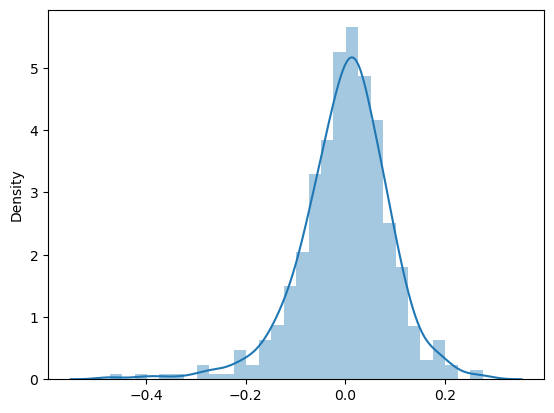

In [151]:
y_train_pred=lr14.predict(X_train_lm)
res=y_train-y_train_pred
sb.distplot(res)

In [152]:
r2_score(y_true=y_train,y_pred=y_train_pred)

0.8366617562511378

## Step 4. Prediction and Evaluation on Test Set

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [153]:
y_train_price = lr14.predict(X_train_lm)

Text(0.5, 0, 'Errors')

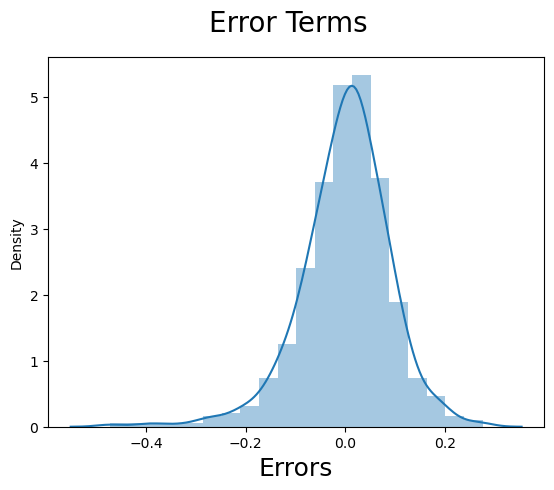

In [154]:
# Plot the histogram of the error terms
fig = plt.figure()
sb.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 5: Making Predictions Using the Final Model

In [155]:
num_vars = ['temp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [156]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light,weathersit_Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [157]:
#### Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [158]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)
X_test_m4

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light,weathersit_Mist
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1.0,1,0,1,0.901354,0.610133,0.153728,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,1.0,0,0,1,0.511964,0.837699,0.334206,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,1.0,0,0,1,0.817246,0.314298,0.537414,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1.0,1,0,0,0.257562,0.708888,0.287411,1,0,0,...,0,0,0,0,1,0,0,0,0,1
702,1.0,1,0,1,0.519232,0.756118,0.283397,0,0,1,...,0,0,0,0,0,0,1,0,0,0
127,1.0,0,0,0,0.584649,0.650923,0.069510,0,1,0,...,0,0,0,0,1,0,0,0,0,0
640,1.0,1,0,1,0.745598,0.817947,0.052115,0,0,1,...,1,0,0,0,0,0,0,1,0,1


In [159]:
X_test_m4 = X_test_m4.drop(['mnth_Oct','season_summer','mnth_Mar','weekday_Wed','mnth_Jun','weekday_Thu','mnth_Aug','holiday','weekday_Sat','weekday_Tue','hum','workingday','season_spring'], axis = 1)

In [160]:
# Making predictions using the fourth model

y_pred_m4 = lr14.predict(X_test_m4)

## Step 6: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

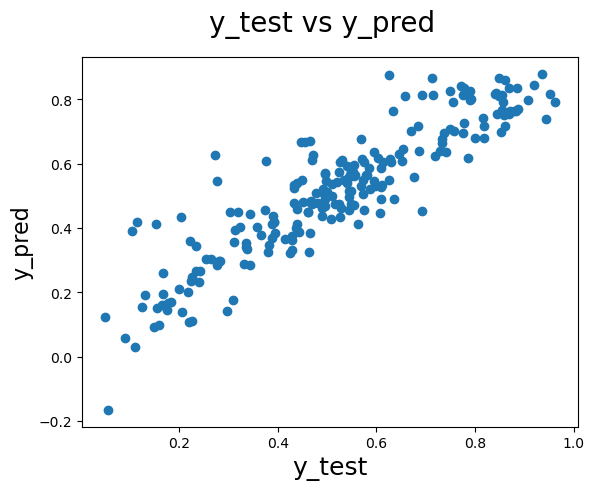

In [161]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [162]:
print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_pred_m4))

0.8366617562511378
0.8085456594473557


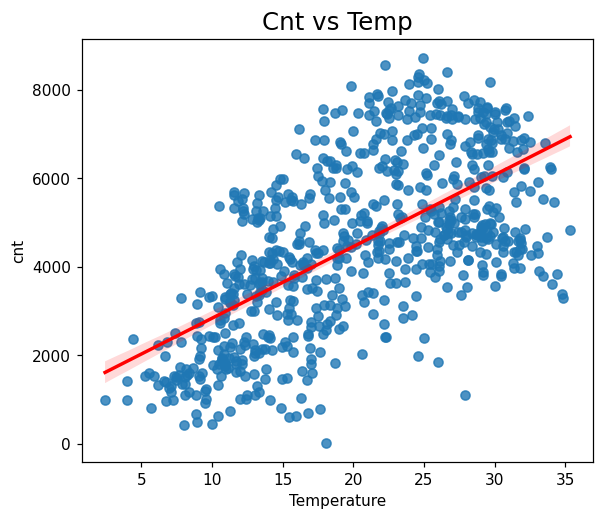

In [164]:
## scatter plot betwwen cnt and temp
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sb.regplot(data=day,y="cnt",x="temp", line_kws={"color": "red"})
plt.xlabel("Temperature")
plt.show()

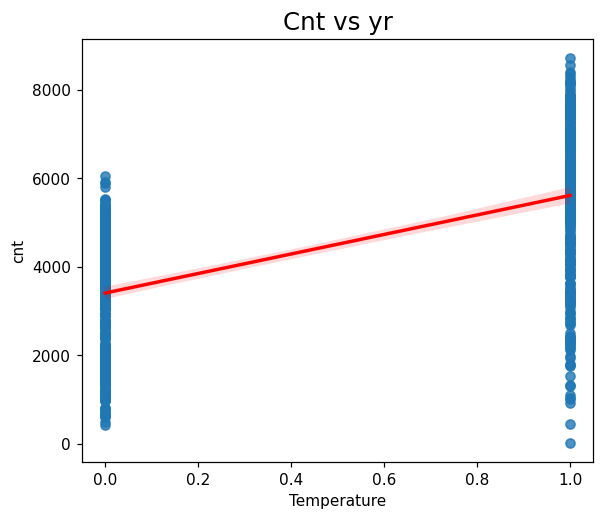

In [165]:
## scatter plot betwwen cnt and yr
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs yr",fontsize=16)
sb.regplot(data=day,y="cnt",x="yr")
plt.xlabel("Temperature")
plt.show()

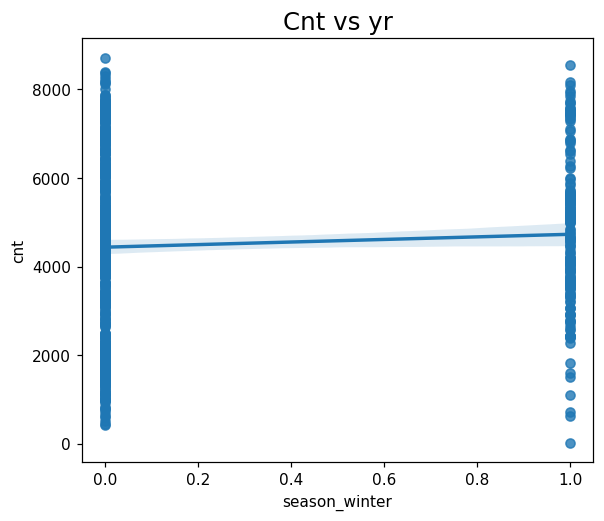

In [168]:
## scatter plot betwwen cnt and winter
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs winter",fontsize=16)
sb.regplot(data=day,y="cnt",x="season_winter")
plt.xlabel("season_winter")
plt.show()

## Inference
1. temp,yr and season_winter have gigh coefficient values hence these features are most important in determining the demand
2. The r2_score for both train and test model are almost same 
   - r2 score for train: 0.8366617562511378
   - r2 score for test : 0.8085456594473557